<a href="https://colab.research.google.com/github/mdhasanali3/yolov5-webcam/blob/main/package_detect_yolov5n_64b_110e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

%cd yolov5
!git clone https://github.com/mdhasanali3/yolov5-webcam.git
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
from IPython.display import Image, clear_output  # to display images
display = utils.notebook_init()  # checks

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 🚀 v6.0-162-gaffa284 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.4/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nnZX1JTzHvqMJrXkIlKY")
project = rf.workspace().project(input())
dataset = project.version(input()).download("yolov5")

/content/yolov5
     |████████████████████████████████| 145 kB 5.5 MB/s 
     |████████████████████████████████| 178 kB 30.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.9 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 138 kB 45.7 MB/s 
     |████████████████████████████████| 62 kB 772 kB/s 
  Created wheel for roboflow: filename=roboflow-0.2.1-py3-none-any.whl size=20914 sha256=9ac687b63e08a25eaff00c91c7e48cce9d961f2c13cf91f04d87520e2c82e437
  Stored in directory: /root/.cache/pip/wheels/57/00/03/2d83f3e90ff41c36eef9c3747c328290c01b06e2619f9ed7b6
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f41b6ea3208e1be5ff6a91ced8852db2053be7a1ffd712cbc9d937c079cedb83
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling 

loading Roboflow workspace...
pro1-giy7x
loading Roboflow project...
1


Extracting Dataset Version Zip to pro1-1 in yolov5pytorch:: 100%|██████████| 3092/3092 [00:03<00:00, 911.99it/s] 


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- pa1
- pa2
- pa3
nc: 3
train: pro1-1/train/images
val: pro1-1/valid/images


In [ ]:

# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python allcontain.py 

/content/yolov5
train dataset path for example /content/yolov5/cokepepsi-3/data.yaml
/content/yolov5/pro1-1/data.yaml
test dataset path for example /content/yolov5/cokepepsi-3/test/images
/content/yolov5/pro1-1/test/images
enter  epoch number
110
enter  batch size 
64
enter  model type for example yolov5s.pt 
yolov5n.pt
enter  model height for example 416 
416
enter  model width for example 416 
416
allcontain: weights=yolov5n.pt, cfg=, data=/content/yolov5/pro1-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=110, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up t

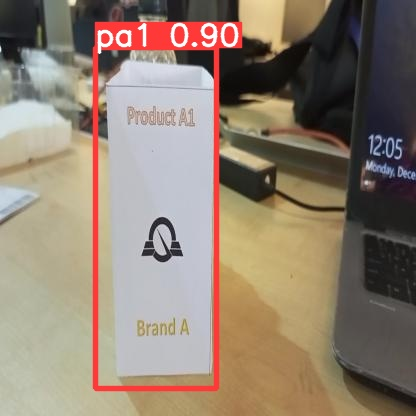

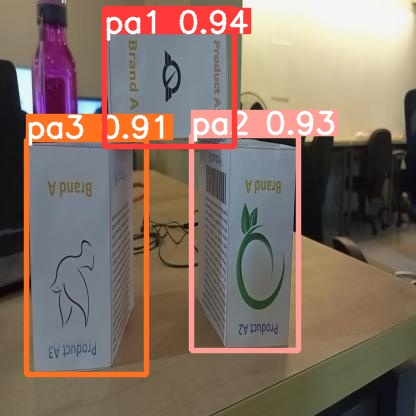

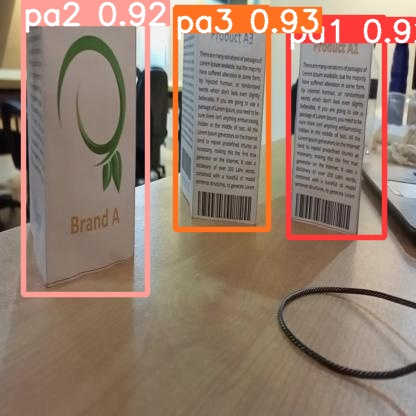

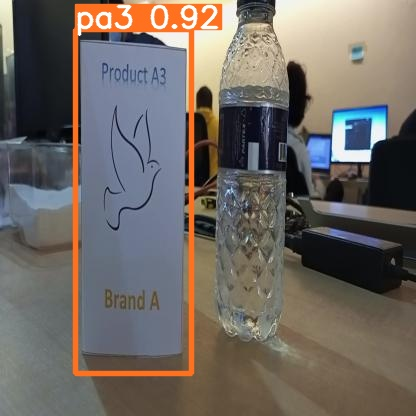

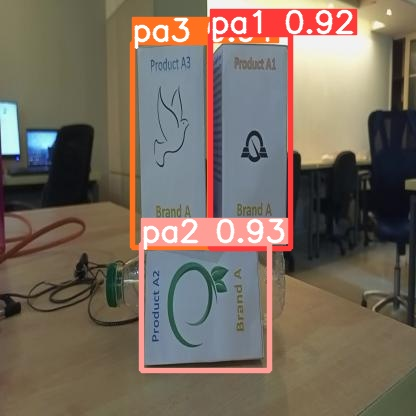

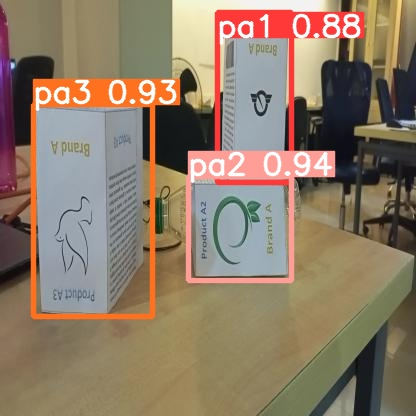

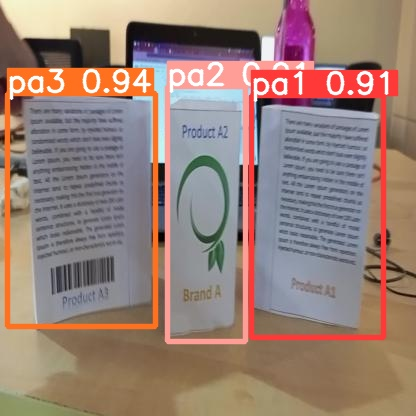

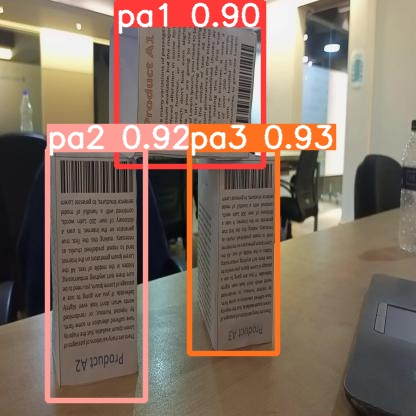

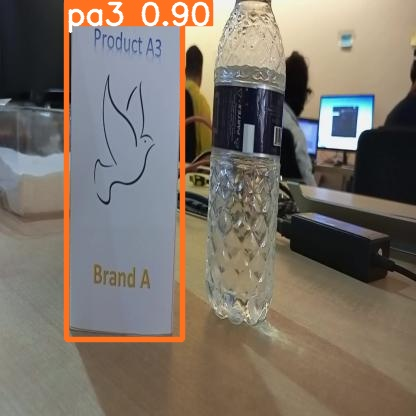

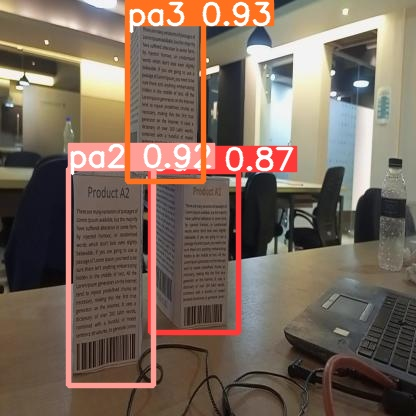

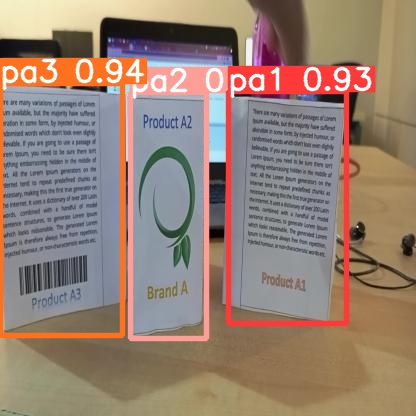

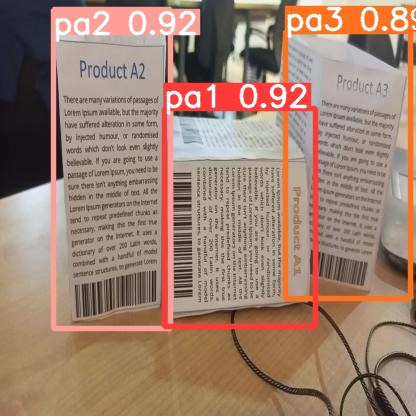

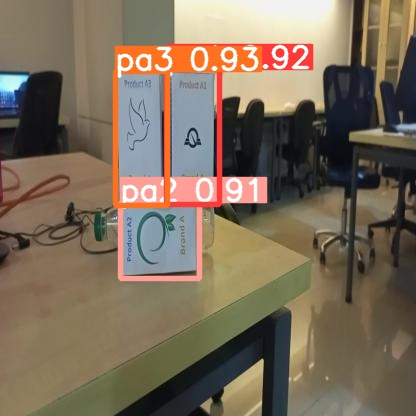

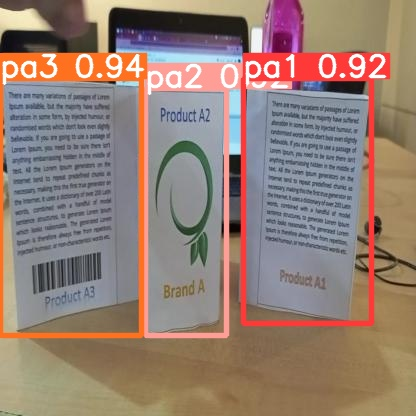

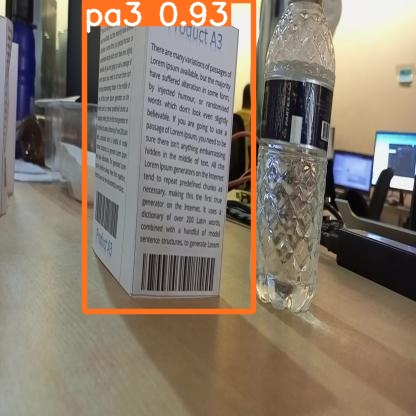

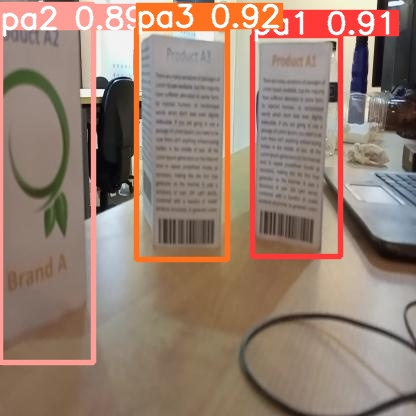

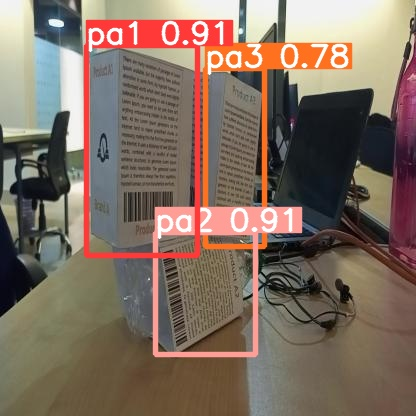

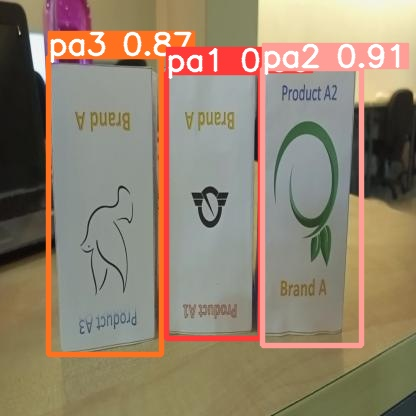

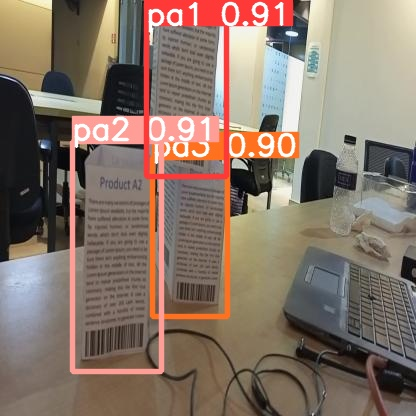

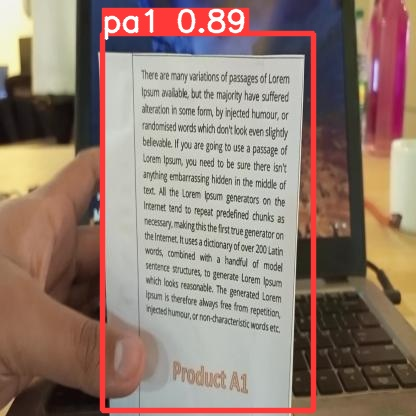

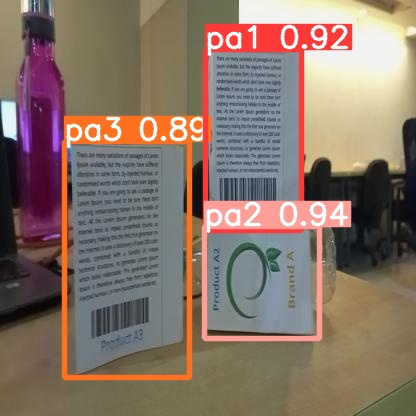

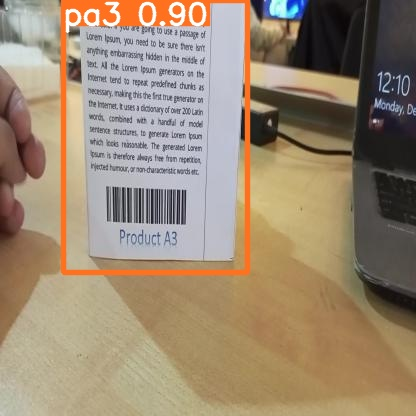

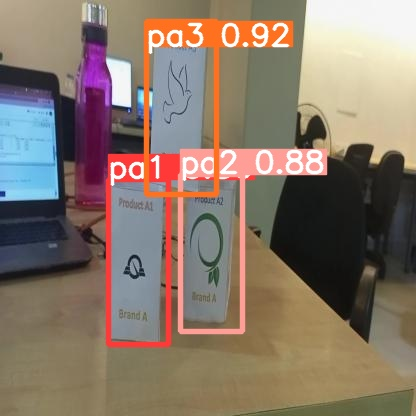

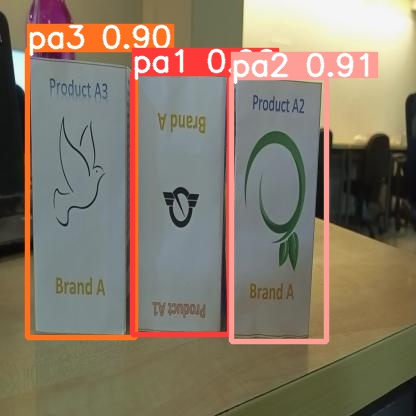

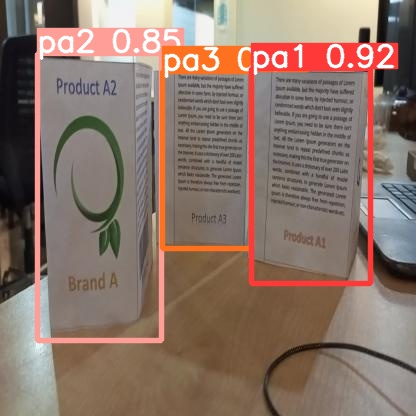

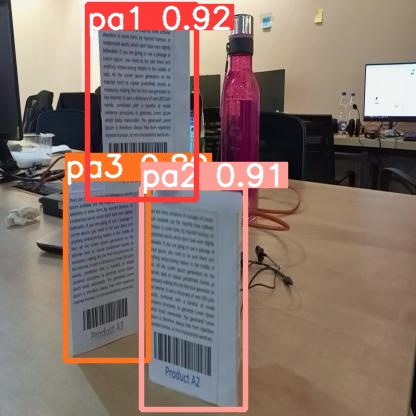

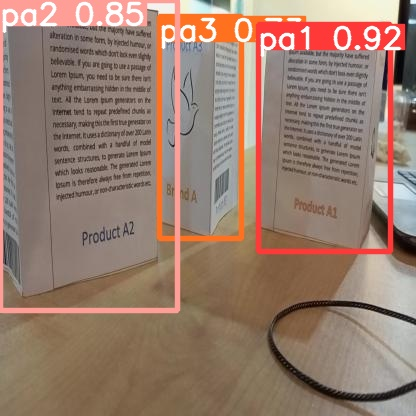

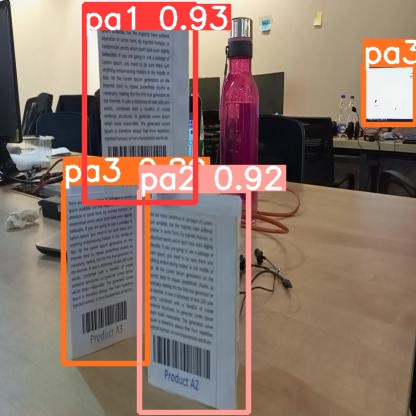

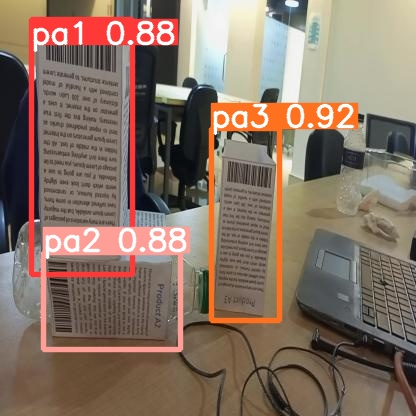

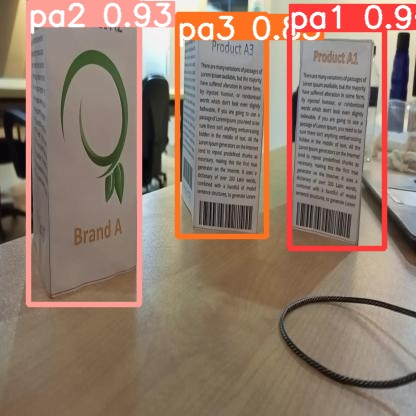

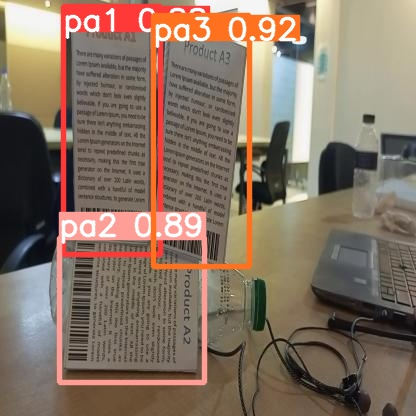

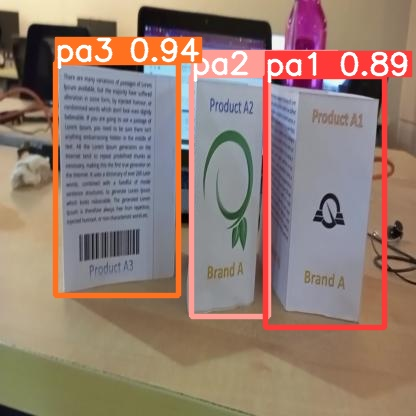

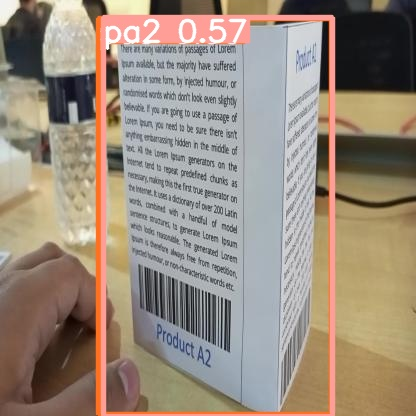

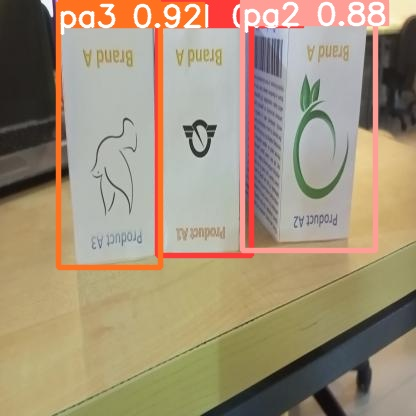

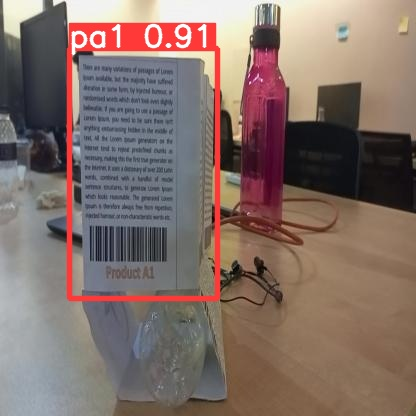

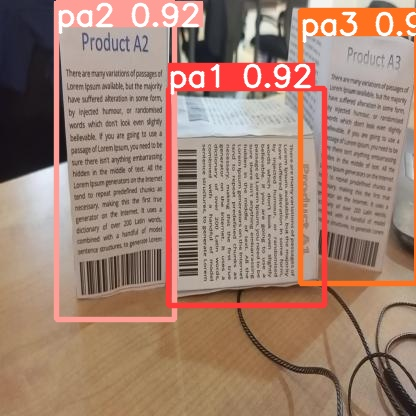

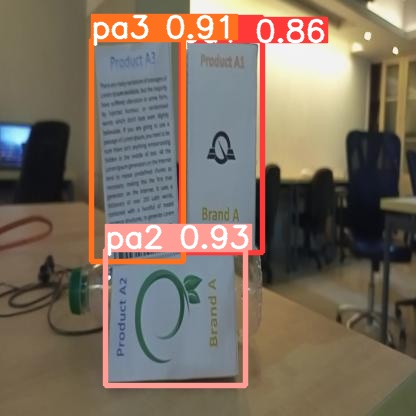

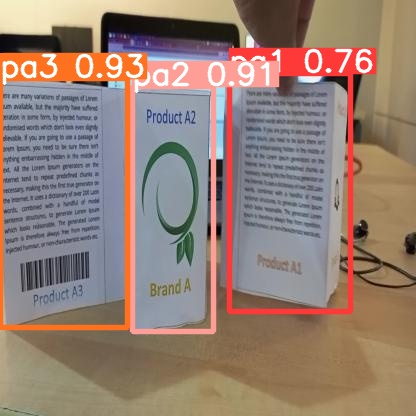

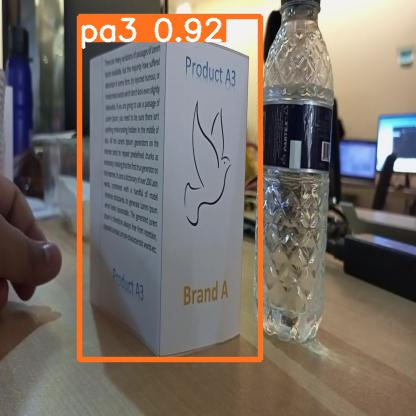

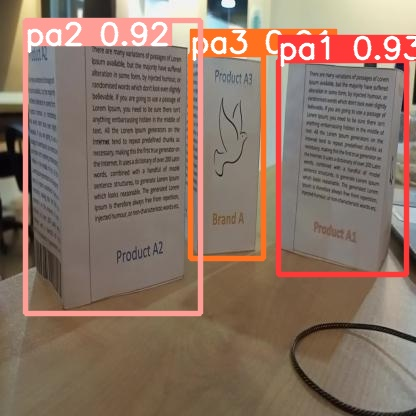

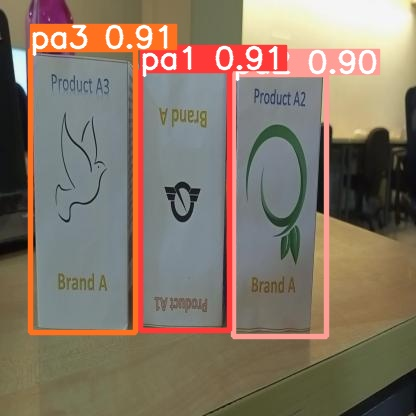

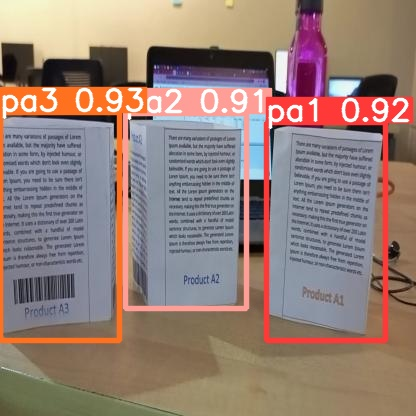

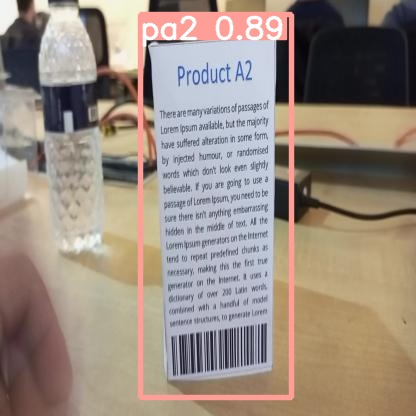

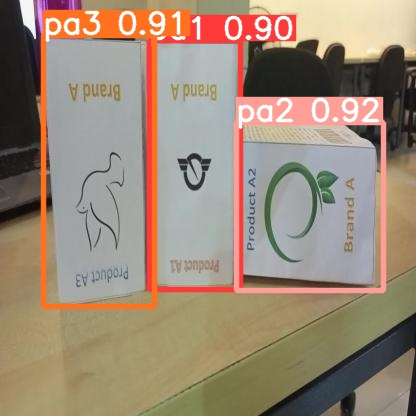

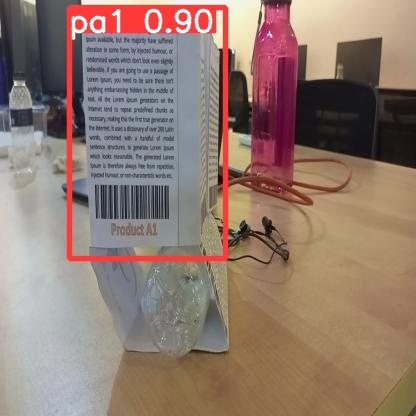

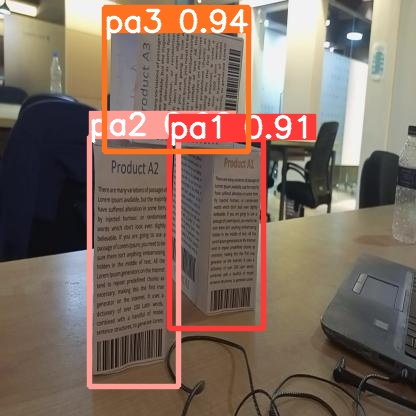

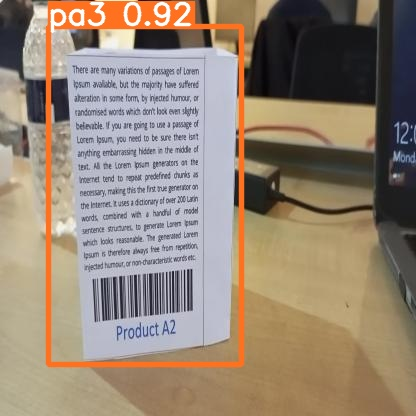

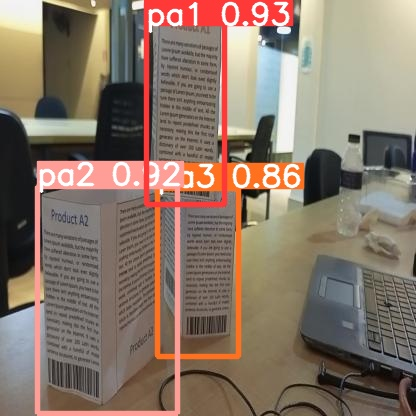

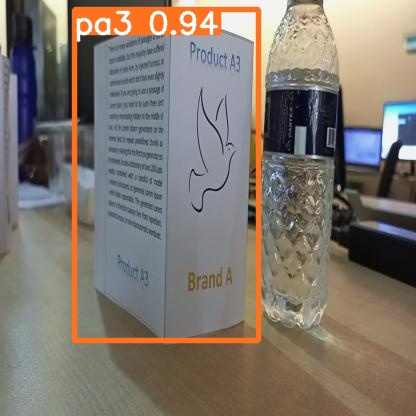

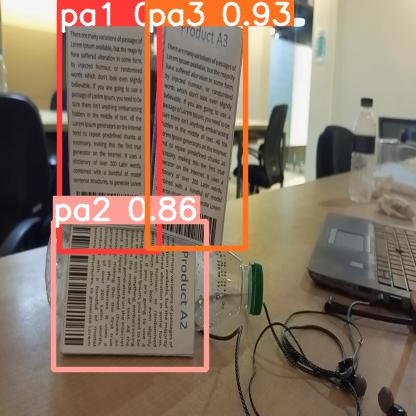

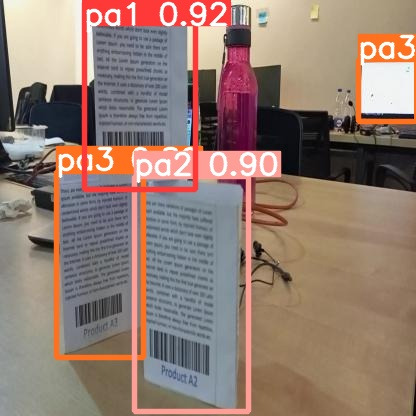

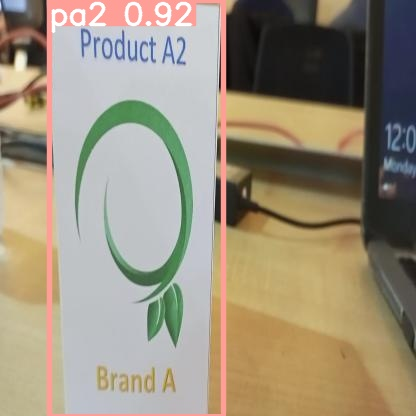

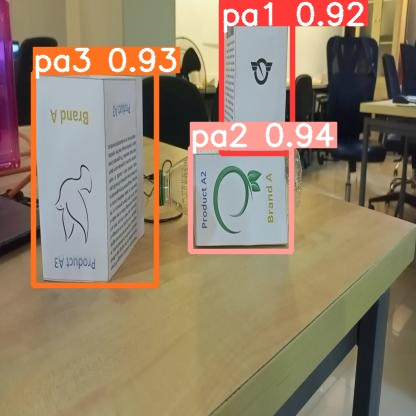

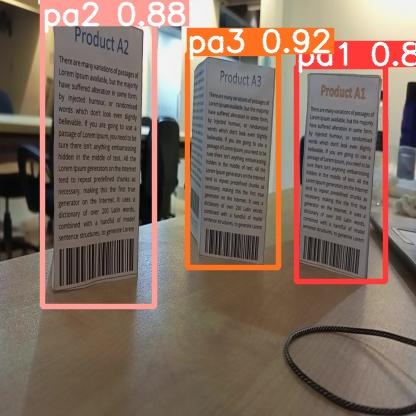

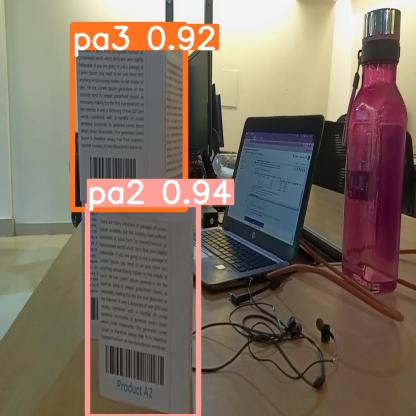

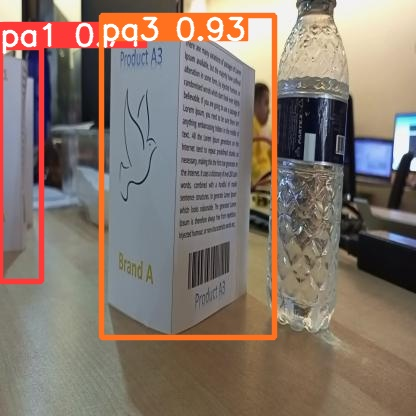

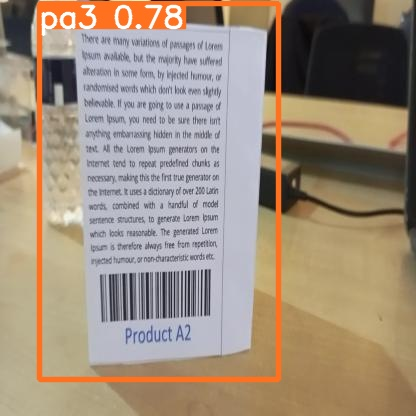

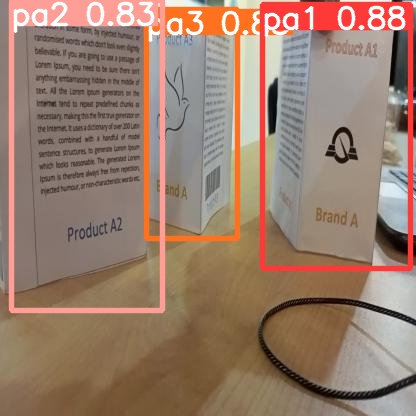

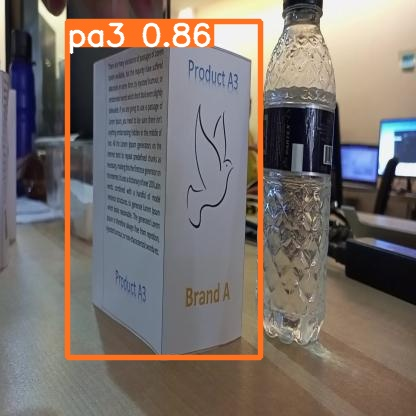

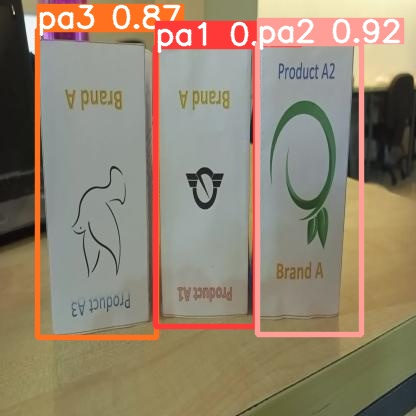

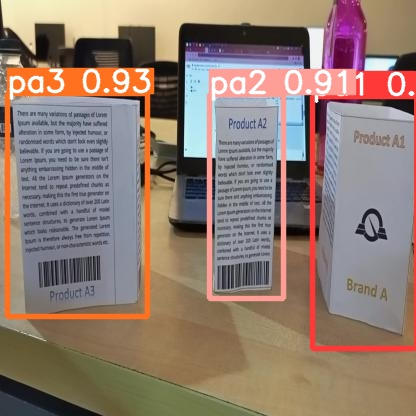

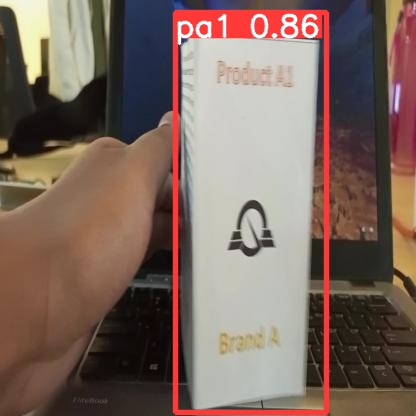

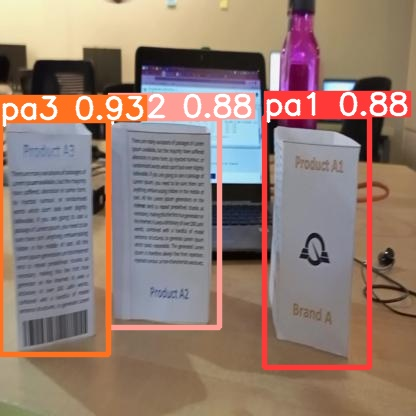

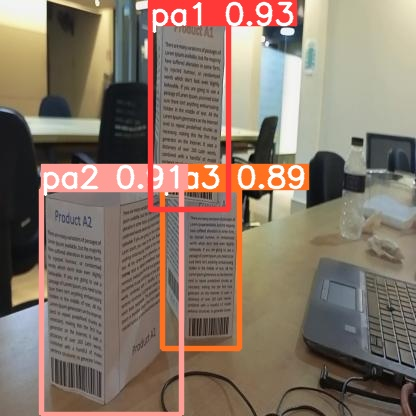

In [ ]:
import glob
from IPython.display import Image, display
 
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
       display(Image(filename=imageName))
       print("\n")

In [ ]:
pwd

'/content/yolov5/yolov5-webcam'

In [ ]:
cd yolov5-webcam

/content/yolov5/yolov5-webcam


In [ ]:
#%cd yolov5-webcam
%cp -r /content/yolov5/runs/train/exp/weights/best_web_model /content/yolov5/yolov5-webcam/public/yolov5n32b60e

In [ ]:
cd /content/yolov5/yolov5-webcam/public

/content/yolov5/yolov5-webcam/public


In [ ]:
cd src

/content/yolov5/yolov5-webcam/src


In [ ]:
!pip install pyYaml
import yaml
import json
with open("/content/yolov5/pro1-1/data.yaml", 'r') as yaml_in, open("names_class.json", "w") as json_out:
    yaml_object = yaml.safe_load(yaml_in) # yaml_object will be a list or a dict
    json.dump(yaml_object, json_out)

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../public/yolov5n32b60e/best_web_model/group1-shard1of2.bin
	modified:   ../public/yolov5n32b60e/best_web_model/group1-shard2of2.bin
	modified:   ../public/yolov5n32b60e/best_web_model/model.json

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add -A

In [ ]:
!git config --global user.email "mail"
!git config --global user.name "mdhasanali3"

In [ ]:
!git commit -m "adding product small image version modeel "


[main 496becf] adding product small image version modeel
 3 files changed, 1 insertion(+), 1 deletion(-)
 rewrite public/yolov5n32b60e/best_web_model/group1-shard1of2.bin (62%)
 rewrite public/yolov5n32b60e/best_web_model/group1-shard2of2.bin (71%)
 rewrite public/yolov5n32b60e/best_web_model/model.json (86%)


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git remote add origin  https://acesstoken@github.com/mdhasanali3/yolov5-webcam.git

In [ ]:
!git remote rm origin 

In [ ]:
!git push -u origin main

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (8/8), 6.27 MiB | 8.61 MiB/s, done.
Total 8 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/mdhasanali3/yolov5-webcam.git
   cc7b9bf..496becf  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [ ]:
!git remote -v

In [ ]:
!git clone https://github.com/mdhasanali3/yolov5-webcam.git


Cloning into 'yolov5-webcam'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 126 (delta 36), reused 96 (delta 16), pack-reused 0
Receiving objects: 100% (126/126), 170.33 MiB | 26.78 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Checking out files: 100% (61/61), done.


In [ ]:
%rm -r /content/yolov5/yolov5-webcam